# Exploratory Data Analysis : Haberman's Survival

## Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer. It is collected from the study of University of Chicago's Billings Hospital between year 1958 to 1970.

### More info about the Dataset :-
* It has four features including class label.
* Column of age have different age group people.
* Year columns tells in which year operation had done.
* Auxillary lymph nodes tells no. of nodes vary from women to women.
* Survival status 1 shows no. of person survived 5 years or more &  survival status 2 shows no. of person died within 5 years.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv')

In [ ]:
df.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
df.shape

(306, 4)

In [ ]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
for cols in df.describe(include='all').columns:
  print(cols)
  print(df[cols].unique())

age
[30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83]
year
[64 62 65 59 58 60 66 61 67 63 69 68]
nodes
[ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]
status
[1 2]


## EDA

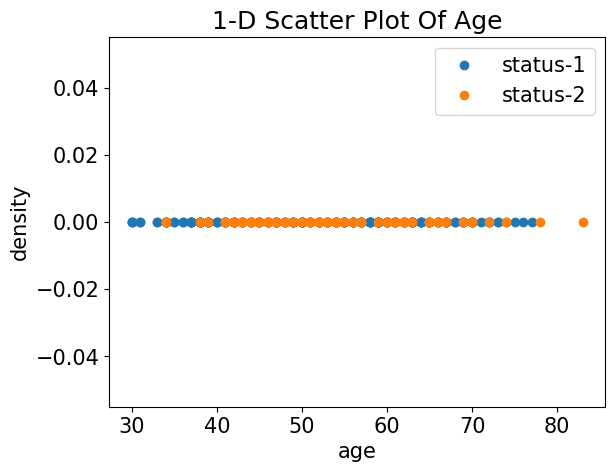

In [ ]:
# 1-D scatter plot

import numpy as np
df_1 = df.loc[df["status"] == 1];
df_2 = df.loc[df["status"] == 2];

#print(df_1["age"])

plt.rcParams.update({'font.size': 15}) #setting font size
label = ['status-1', 'status-2']
plt.plot(df_1["age"], np.zeros_like(df_1['age']), 'o')
plt.plot(df_2["age"], np.zeros_like(df_2['age']), 'o')
plt.title("1-D Scatter Plot Of Age")
plt.xlabel("age" )
plt.ylabel("density")
plt.legend(label)
plt.show()

### ✅ Observation: Most Female Who died have age from 40 - 70. 

<Axes: xlabel='age', ylabel='year'>

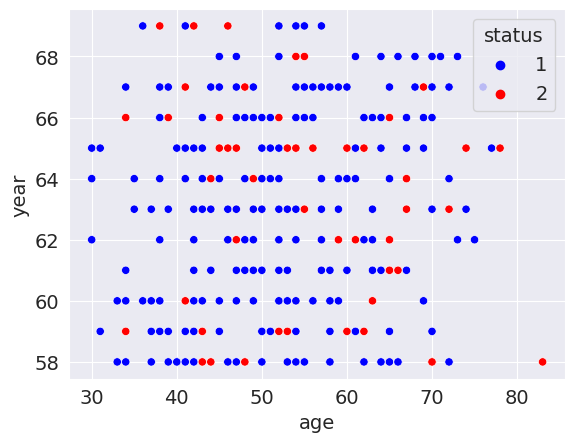

In [ ]:
plt.rcParams['font.size']=14
sns.set_style('darkgrid')
sns.scatterplot(x='age',y='year',hue='status',data=df,palette=['blue','red'])

<Axes: xlabel='age', ylabel='nodes'>

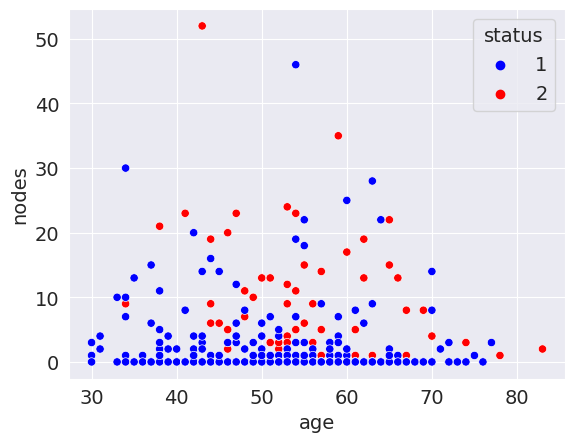

In [ ]:
plt.rcParams['font.size']=14
sns.set_style('darkgrid')
sns.scatterplot(x='age',y='nodes',hue='status',data=df,palette=['blue','red'])

### ✅ Observation : From Here we can say Female which have less nodes are more likely to survive.

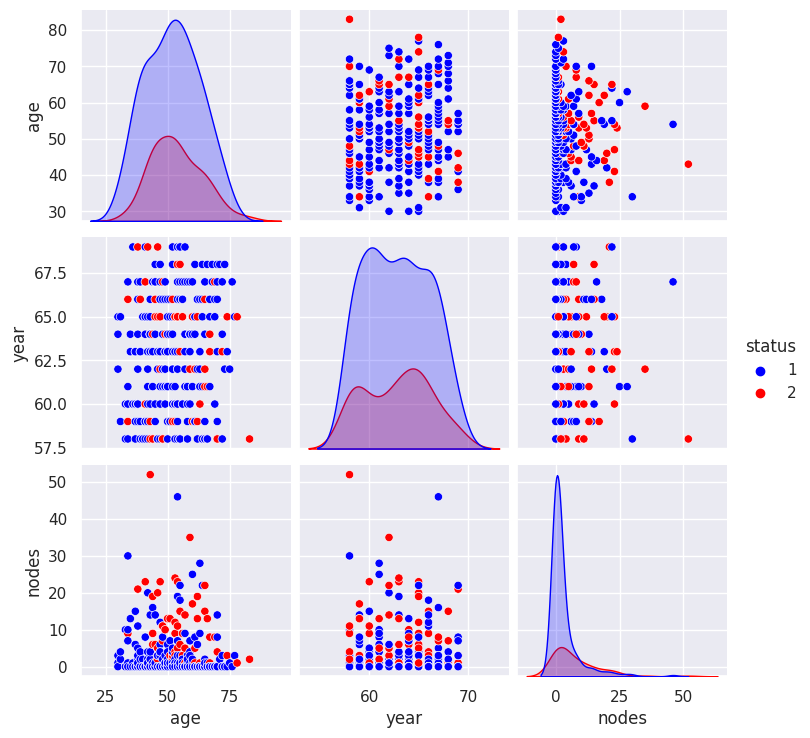

In [ ]:
plt.close;
sns.set(rc={'figure.figsize':(25,10)})
sns.pairplot(x_vars=['age','year','nodes'],y_vars=['age','year','nodes'],hue='status',data=df,palette=['blue','red']);

### ✅ Observation: 
1. Lymph Nodes Parameter gives more information than other parameter.
2. People who are treated in later year are more likely to survive may due to proper treatment.

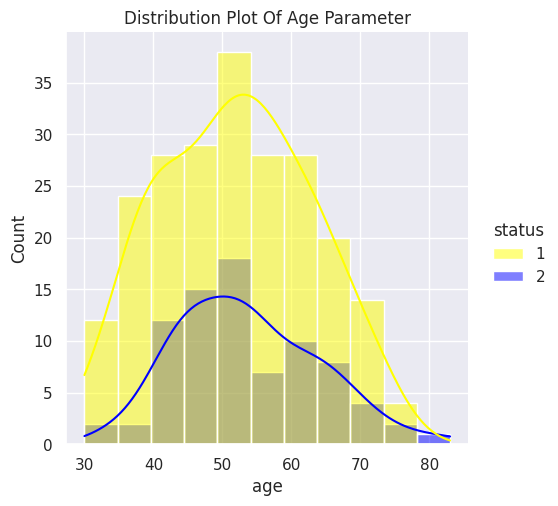

In [ ]:
sns.displot(x='age',hue='status',palette=['yellow','blue'],data=df,kde=True);
plt.title('Distribution Plot Of Age Parameter');

### ✅ Obs: Women from Age 30 - 40 had less died. 

Text(0.5, 1.0, 'Histogram for Year')

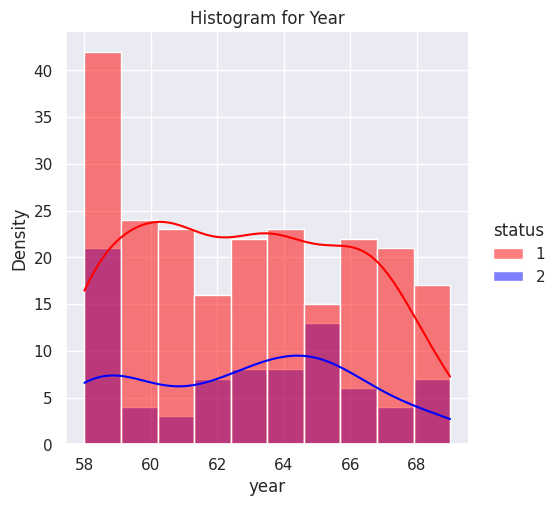

In [ ]:
sns.displot(x='year',hue='status',palette=['red','blue'],data=df,kde=True)
plt.ylabel('Density')
plt.title('Histogram for Year')

### ✅ Obs: In starting year of treatment 1958-1959 Women had died more.

In [1]:
sns.displot(x='nodes',hue='status',palette=['red','blue'],data=df,kde=True)
plt.ylabel('Density')
plt.title('Histogram for Nodes Parameter')

NameError: ignored

### PDF And CDF

### ✅ Obs:
1. Women who have very few lymph nodes had survived more.
2. Survival chances of women had decreased with increase in lymph nodes.

In [ ]:
df1 = df.loc[df['status']==1]
df2 = df.loc[df['status']==2]

Count: [0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
Count: [0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


Text(0, 0.5, '% of Person')

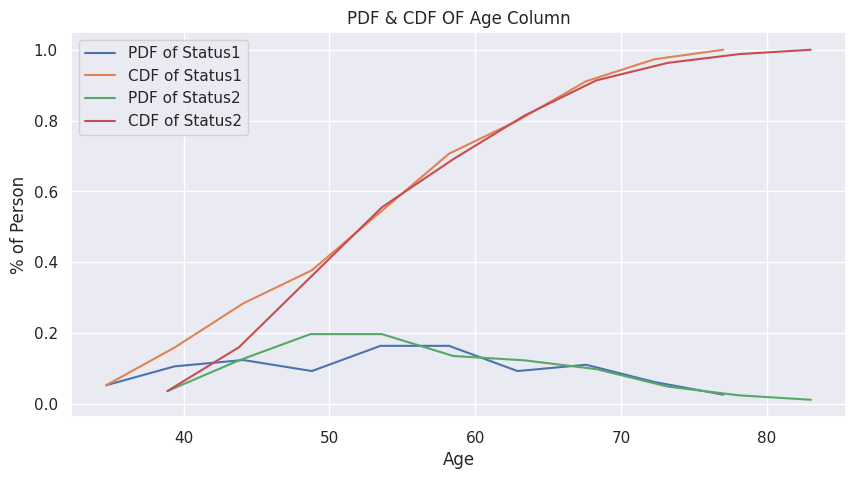

In [ ]:
plt.close;
count, bin_edges = np.histogram(df1['age'], bins=10, density = True)
print(f'Count: {count}')
print(f'Bin Edges: {bin_edges}')
pdf = count/(sum(count))
print('PDF: {}'.format(pdf))

cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

sns.set(rc={'figure.figsize':(10,5)})
plt.close;
count, bin_edges = np.histogram(df2['age'], bins=10, density = True)
print(f'Count: {count}')
print(f'Bin Edges: {bin_edges}')
pdf = count/(sum(count))
print('PDF: {}'.format(pdf))

cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf);
plt.title('PDF & CDF OF Age Column')
plt.legend(['PDF of Status1','CDF of Status1','PDF of Status2','CDF of Status2'])
plt.xlabel('Age')
plt.ylabel('% of Person')

### ✅ Obs: 
1) 18 % of women which are below age 38 had surived successfully.

2) Women of age more than 78 had more likely to die.

Text(0, 0.5, '% of Person')

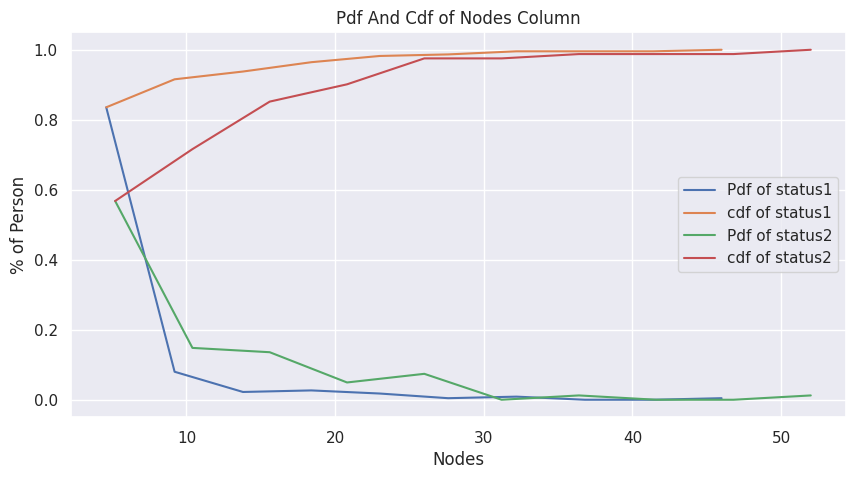

In [ ]:
count, bin_edges = np.histogram(df1['nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

count, bin_edges = np.histogram(df2['nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf of status1','cdf of status1','Pdf of status2','cdf of status2'])
plt.title('Pdf And Cdf of Nodes Column')
plt.xlabel('Nodes')
plt.ylabel('% of Person')

### ✅ Obs: Approximately 99 % of Women with 46 or more lymph nodes had not survived.

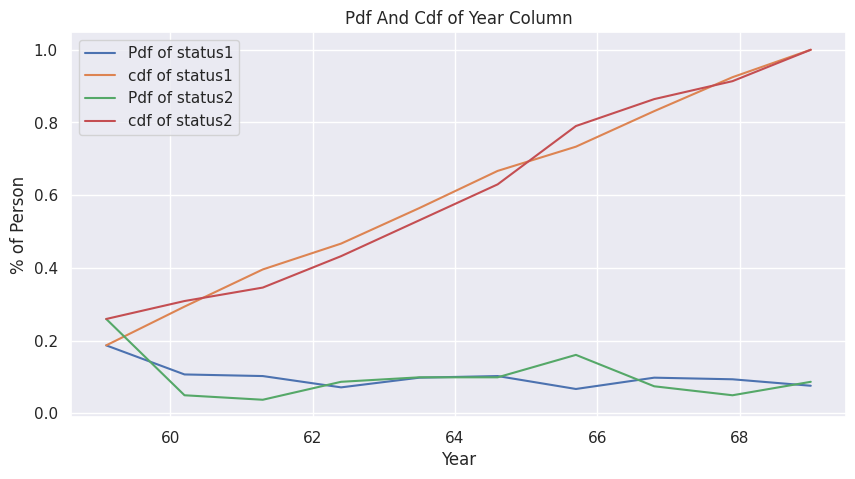

In [ ]:
count, bin_edges = np.histogram(df1['year'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

count, bin_edges = np.histogram(df2['year'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Pdf of status1','cdf of status1','Pdf of status2','cdf of status2'])
plt.title('Pdf And Cdf of Year Column')
plt.xlabel('Year')
plt.ylabel('% of Person');

### ✅ Obs: Both the graph line are coinciding. Hence, not useful.

## Mean, Median , MAD, Percentile

In [ ]:
print(np.mean(df1['age']))
print(np.mean(df2['age']))

print(np.mean(df1['year']))
print(np.mean(df2['year']))

print(np.mean(df1['nodes']))
print(np.mean(df2['nodes']))

52.01777777777778
53.67901234567901
62.86222222222222
62.82716049382716
2.7911111111111113
7.45679012345679


In [ ]:
df1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [ ]:
df2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [ ]:
print(np.percentile(df1['age'],90))   #90th Percentile
print(np.percentile(df2['age'],90))   #90th Percentile

67.0
67.0


In [ ]:
# 0 , 25, 50, 100 th percentile
print(np.percentile(df1['age'],np.arange(0,125,25)))
print(np.percentile(df1['year'],np.arange(0,125,25)))
print(np.percentile(df1['nodes'],np.arange(0,125,25)))

[30. 43. 52. 60. 77.]
[58. 60. 63. 66. 69.]
[ 0.  0.  0.  3. 46.]


### Box Plot Whiskers

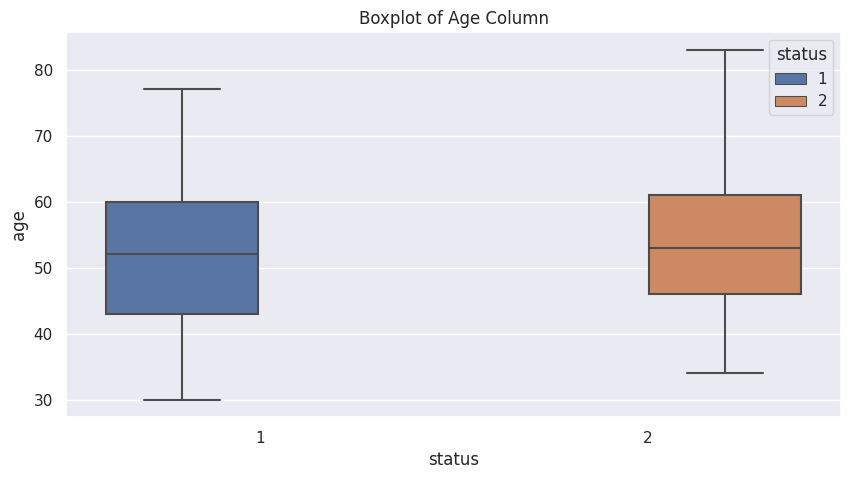

In [ ]:
plt.title('Boxplot of Age Column')
sns.boxplot(x='status',y='age',hue='status',data=df);


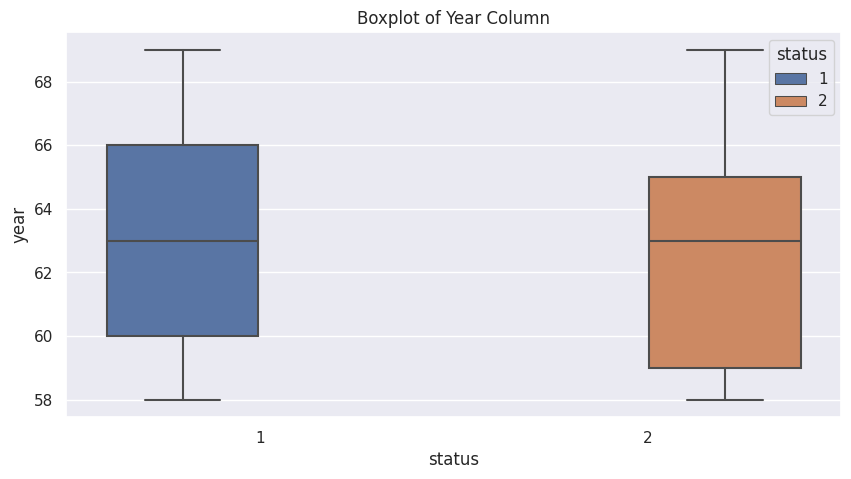

In [ ]:
plt.title('Boxplot of Year Column')
sns.boxplot(x='status',y='year',hue='status',data=df);


### Obs: 20% of women which had treated in starting year had died.

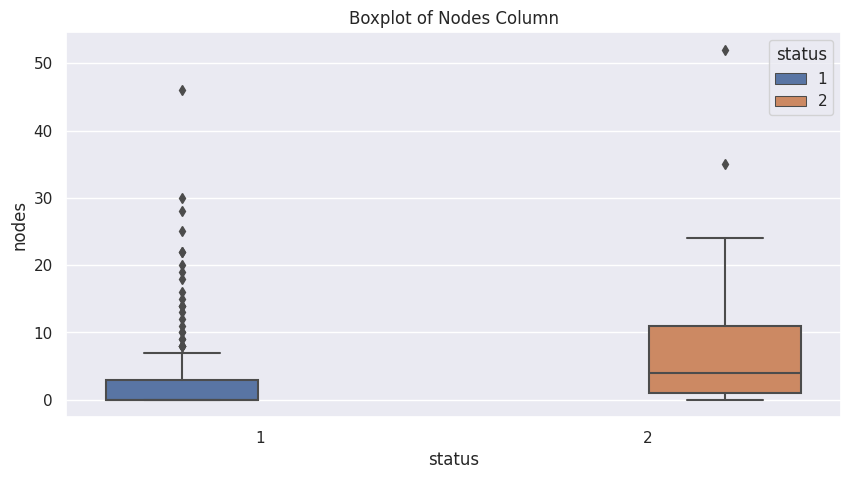

In [ ]:
plt.title('Boxplot of Nodes Column')
sns.boxplot(x='status',y='nodes',hue='status',data=df);


### Obs: Outliers are shown in Box Plot of status 1 and 50% of patients with lymph nodes less than or equal to 3 had survived.

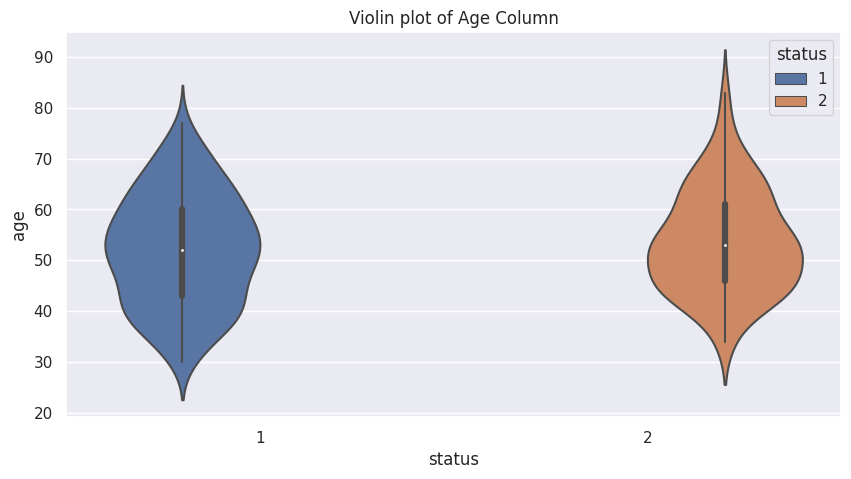

In [ ]:
plt.title('Violin plot of Age Column')
sns.violinplot(x='status',y='age',hue='status',data=df);


### Obs: 
* Women who died were mostly from age 45-55.
* Similarly Women who successfully survived were from age 47- 57.



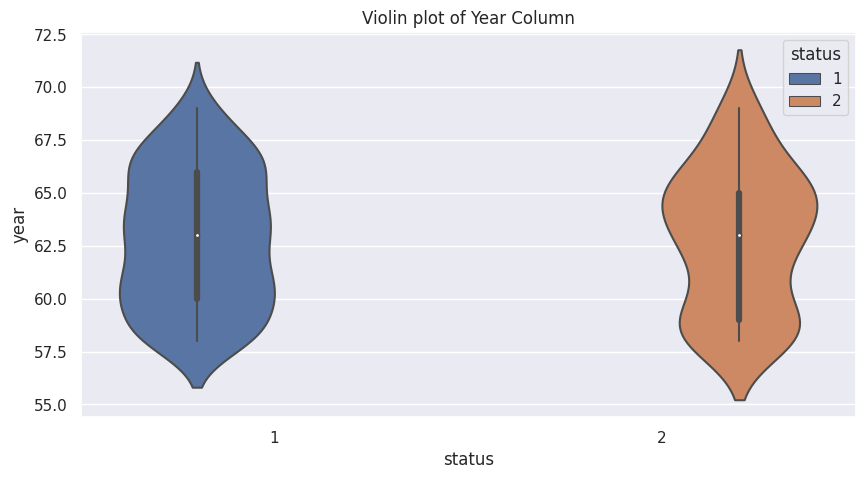

In [ ]:
plt.title('Violin plot of Year Column')
sns.violinplot(x='status',y='year',hue='status',data=df);


### Obs: 
* In 1962 few people died as compared to other but In 1965, more people died due to unsuccessful operation, it depends on other parameter also.
* Many people had survived in year 1959 to 1964 due to successful operation.

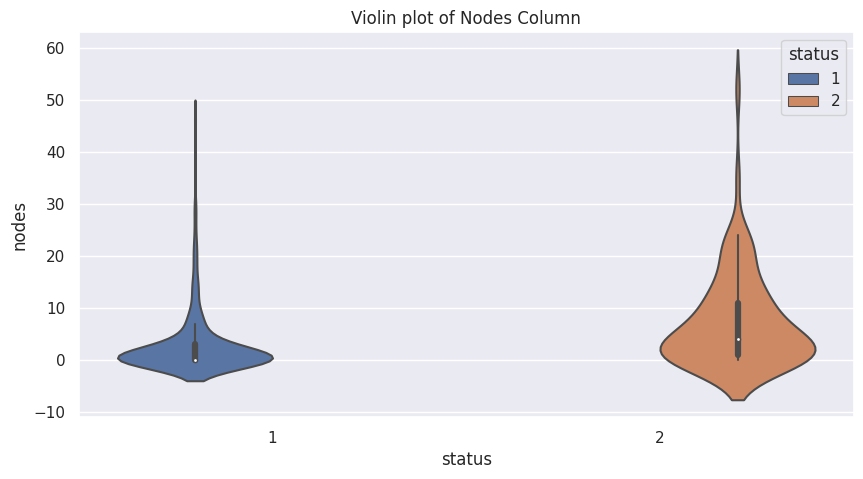

In [ ]:
plt.title('Violin plot of Nodes Column')
sns.violinplot(x='status',y='nodes',hue='status',data=df);


### ✅Obs:
* Patients with more nodes are less likely to survive.
* Patients having zero nodes did surive but some also died. So lymph nodes are not accurate for survival

### ⚾ **Overall Conclusion**:


*   **Age** : 
      1) Women from Age 30 - 40 had less died.

       2) 18 % of women which were below age 38 had surived successfully.

     3) Women who had died were mostly of age 45-55.

     4) Similarly Women who successfully survived were from age 47- 57.

     5) Women of age more than 78 had more likely to die.

*  **Year** :

     1) In starting year of treatment 1958-1959 Women had died more.

     2) Many people had survived in year 1959 to 1964 due to successful operation.

     3) In 1962 few people died as compared to other but In 1965, more people died due to unsuccessful operation, it depends on other parameter also.

     4) People who are treated in later year are more likely to survive may due to proper treatment.
* **Nodes** :

     1) Approximately 99 % of Women with 46 or more lymph nodes had not survived.

     2) Women who have very few lymph nodes (0-3) had survived more.

     3) Survival chances of women had decreased with increase in lymph nodes.


   

